In [48]:
import tensorflow as tf
import tensorflow.compat.v1 as tf


# 创建图，启动图

In [19]:
# 创建常量op
m1 = tf.constant([[3,3]])
m2 = tf.constant([[2],[3]])
product = tf.matmul(m1,m2)

In [20]:
print(product)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


In [21]:
# 定义一个会话,启动默认图
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()

[[15]]


# 变量

In [23]:
x = tf.Variable([1,2])
a = tf.constant([3,3])

sub = tf.subtract(x,a)
add = tf.add(x,sub)

# 变量进行初始化
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(sub))
    print(sess.run(add))
    

[-2 -1]
[-1  1]


In [24]:
# 创建变量初始化为0
state =tf.Variable(0,name='counter')
new_value = tf.add(state,1)
# 赋值不能直接放等号,new_value赋给state
update = tf.assign(state,new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))

1
2
3
4
5


# fetch & feed

In [13]:
#fetch
tf.compat.v1.disable_eager_execution()

input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)

add = tf.add(input2,input3)
mul = tf.multiply(input1,add)

with tf.Session() as sess:
    result = sess.run([mul,add])
#     result = sess.run(mul)
    print(result)

[21.0, 7.0]


In [12]:
# 创建占位符，feed
tf.compat.v1.disable_eager_execution()

input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1,input2)

with tf1.Session() as sess:
#     字典形式传入
    print(sess.run(output,feed_dict={input1:[7.0],input2:[2.0]}))

[14.]


# 案例

In [20]:
import numpy as np

x_data = np.random.rand(100)
y_data = x_data*0.1+0.2

# 定义线性模型
b = tf.Variable(10.)
k = tf.Variable(0.)
y = k*x_data + b

# 二次代价函数,reduce_mean（取平均）
loss = tf.reduce_mean(tf.square(y_data-y))
# 定义一个梯度下降法优化器
optimizer = tf.train.GradientDescentOptimizer(0.2)
# 定义一个最小化代价函数
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if step%20 == 0:
            print(step,sess.run([k,b]))

0 [-1.7643994, 6.0981283]
20 [-1.88641, 1.1796474]
40 [-0.92772734, 0.7068455]
60 [-0.43172407, 0.462231]
80 [-0.17510262, 0.3356727]
100 [-0.04233218, 0.27019414]
120 [0.026360402, 0.23631693]
140 [0.061900448, 0.2187896]
160 [0.080288105, 0.20972134]
180 [0.08980149, 0.2050296]
200 [0.0947235, 0.20260221]


# 线性回归

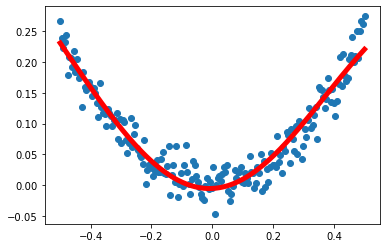

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# 对于[: , np.newaxis] 和 [np.newaxis，：]
# 是在np.newaxis这里增加1维。
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

# 定义两个placeholder
x =tf.placeholder(tf.float32,[None,1]) # 行不确定，一列
y =tf.placeholder(tf.float32,[None,1])

# 定义神经网络中间层
Weights_L1 = tf.Variable(tf.random.normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1)+biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2)+biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    #     获得预测值
    prediction_value = sess.run(prediction,feed_dict = {x:x_data})
    #prediction_value = sess.run(prediction)
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()
    sess.close()
    

# softmax

In [37]:
# 
# softmax经常用于给不同的对象分配概率 softmax = exp(xi)/sigma(j,exp(xj))


# mnist数据集分类

In [ ]:
from tensorflow import keras
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

#mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

In [58]:
#from tensorflow.compat.v1.examples.tutorials.mnist import input_data
from tensorflow import keras
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

batch_size = 100 #每个批次大小
n_batch = minst.train.num_expmales // batch_size #一共有多少批次

# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784]) #None即输入数据的数量，这里就会是100
y = tf.placeholder(tf.float32,[None,10])

# 创建网络
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
train_step = tf.train.GradientDescentOptimizer(0.2),minimize(loss)

#初始化变量
init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) #比较两个值的大小，返回True/False，argmax函数求prediction在哪个位置值最大，返回横排索引
# 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) # 转换布尔型为浮点型，True变为1，False变为0

with tf.Session() as sess:
    sess.run(init)
    for eqoch in range(21): #训练次数
        for batch in range(n_batch):
            batch_xs.batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test,y:mnist.test.labels})
        print("Iter" + str(epoch)+",Testing Accuracy" + str(acc))
        

ModuleNotFoundError: No module named 'tensorflow.examples.tutorials'

# 代价函数

二次代价函数+梯度下降法:
此时求偏导发现
w和b的梯度（变化）跟激活函数的梯度（导数）成正比，激活函数的梯度越大，w和b调整更快，收敛越快
比如softmax函数越靠近0，函数梯度越大，w和b改变约快；越靠近1，梯度越小，w，b越慢改变。所以根据调整方向的需求不同，这就有时候导致误差大时调整步子小或误差小时调整步子大，所以有时候会产生参数调整不太合理的情况，此时我们可以引入交叉熵代价函数

交叉熵:
loss = -sigma(ylna+(1-y)ln(1-a))/n ，a是输出值，y是实际值
此时求偏导可以发现权值和偏置值与激活函数的偏导无关，而与输出值和实际值的误差成正比，所以误差越大，梯度越大，参数调整越快，训练速度越快


总结：
如果神经元输出是线性的，则适合二次代价函数，
如果输出神经元是s型函数，则适合交叉熵

对数释然代价函数
经常用对数释然代价函数与softmax组合，如果是sigmoid也可以采用交叉熵
tf.nn.sigmoid_cross_entropy_with_logits() #表示跟sigmoid搭配使用的交叉熵
tf.nn.softmax_cross_entropy_with_logits() #表示跟softmax搭配使用的交叉熵




# 对上一个例子改变的部分实例

loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))

# 拟合问题

防止过拟合可以采用：1.增加数据集 2.正则化方法（增加权重设置） 3.Dropout（随机扔掉神经元进行操作）


In [ ]:
# 接着上一个例子 ——Dropout

# 创建网络
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

# 建立时其实不一定初始化为0，以下截断式的正态分布初始化效果可能更好
W1 = tf.Variable(tf.truncated_normal([784,2000],stddev=0.1))
b1 = tf.Variable(tf.zeros([2000])+0.1)
L1 = tf.nn.tanh(tf.matmul(x,W1)+b1)
# keep_prob意味着多少比例神经元可以用，设置为1时等于全部使用
L1_drop = tf.nn.dropout(L1,keep_prob)  

W2 = tf.Variable(tf.truncated_normal([2000,10],stddev=0.1))
b2 = tf.Variable(tf.zeros([10])+0.1)
prediction = tf.nn.softmax(tf.matmul(x,W2)+b2)


# 优化器

tf.train.GradientDescentOptimizer 梯度下降
tf.train.AdadeltaOptimizer
tf.train.AdagradDAOptimizer
tf.train.AdagradOptimizer
tf.train.AdamOptimizer
tf.train.MomentumOptimizer
tf.train.RMSPropOptimizer


优化器对比：
1. 标准梯度下降——先计算所有样本汇总误差，再根据总误差取平均值
2. 随机梯度下降（SGD）——随机抽取一个样本来计算误差，然后更新权值
3. 批量梯度下降——折中方法，从样本钟选取一个批次（如10000中选取100个作为一个batch），然后计算这个batch的总误差更新权重

训练样本比较大的话，标准梯度速度会比较慢，但噪声少；而随机梯度速度快，但可能噪声多
一般批量的方式用的多一点

参数：
W：要训练的参数
J（W）：代价函数
ΔJ（W）：代价函数的梯度
μ：学习率

1. SGD:略（数学证明，即之前所云成正i相关时的数学式子）

2. Momentum：相比SGD多了动力项，即当前权值的改变会受到上一次改变的影响，动力项Y通常设置为0.9
W-W-Vt
Vt=YVt-1+μΔJ(W)(<-SGD误差项)

3. NAG：和Momentum合并在一个函数中，可以通过参数配置启用
NAG改善了Momentum盲目跟从下坡的问题，预测下一次下降的位置，提升提前计算下一个位置的能力
W-W-Vt
Vt=YVt-1+μΔJ(W-YVt-1)

4. Adagrad：基于SGD，但给予常见数据比较小的学习率去调整参数，不常见的数据比较大的学习率去调整参数，蛇和用于数据稀疏的数据集
优点在于不用认为调整学习率，但缺点在于随着迭代次数增多，学习率会逐渐降低
学习率将随着梯度的倒数增长，也就是说较大梯度具有较小的学习率，而较小的梯度具有较大的学习率，可以解决普通的sgd方法中学习率一直不变的问题

5. RMSprop：均方根的缩写
借鉴了Adagrad的思想，不过这里只用到了前T-1次梯度的平方的平均，并不存在分母前t次误差的累加导致学习率越来越低到0的问题

6. Adadelta：
不需要设置学习率，采用了牛顿迭代的思路

7. Adam
β1一般设置为0.9，β2一般设置为0.99
Adam会存储之前衰减的平方梯度，
实现简单，计算高效，对内存需求少
参数的更新不受梯度的伸缩变换影响


总结：
速度和功能示意图 视频21分
https://www.bilibili.com/video/BV1kW411W7pZ?p=13

# 优化器

In [ ]:
针对上述例子的补充

train_step = tf.train.AdamOptimizer(1e-2).minimize(loss)

tf.assign(lr,0.001*(0.95*epoch)) 
这个函数可以使得学习率随epoch增大减小，防止震荡而无法收敛

# tensorboard

In [ ]:
基于上述例子
# 命名空间

In [ ]:
with tf.name_scope("input"):
    x = tf.placeholder(tf.float32,[None,784],name='x-input') #None即输入数据的数量，这里就会是100
    y = tf.placeholder(tf.float32,[None,10],name='y-input')

with tf.Session() as sess:
    sess.run(init)
    # 存放路径
    writer = tf.summary.FileWriter('logs/',sess.gragh)
    for eqoch in range(21): #训练次数
        for batch in range(n_batch):
            batch_xs.batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test,y:mnist.test.labels})
        print("Iter" + str(epoch)+",Testing Accuracy" + str(acc))
          